<a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Euclidean_and_Lobachevsky_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MoebInv Example: Euclidean and Lobachevsky lines

## Installing required software


First we need to install require packages: GiNaC and boostPython from generic archive.

In [0]:
!apt-get update && apt-get -qq install -y ginac-tools asymptote libboost-python1.65.1 libpython3.6 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [628 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [76

Then we download the custom binary packages with MoebInv library and Python wrapper for GiNac and MoebInv. This script will update your installation to the current version if you had the libraries already installed.

Please report any issues to me (kisilv@maths.leeds.ac.uk).

In [0]:
%%bash
CURREN_MOEBINV=libmoebinv0_3.5.0-1_amd64.deb
curl -LO https://sourceforge.net/projects/moebinv/files/binary/debian/$CURREN_MOEBINV; \ 
dpkg -i $CURREN_MOEBINV && rm $CURREN_MOEBINV ; \

# remove the an installed version of the Python wrapper 
if [ -f /usr/bin/moebinv-uninstall.sh ]; then \ 
  /usr/bin/moebinv-uninstall.sh ; \
fi 
curl -L https://sourceforge.net/projects/moebinv/files/binary/pymoebinv.tbz | tar jvx --directory=/

Selecting previously unselected package libmoebinv0:amd64.
(Reading database ... 150665 files and directories currently installed.)
Preparing to unpack libmoebinv0_3.5.0-1_amd64.deb ...
Unpacking libmoebinv0:amd64 (3.5.0-1) ...
Setting up libmoebinv0:amd64 (3.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
./
./usr/
./usr/bin/
./usr/bin/moebinv-uninstall.sh
./usr/lib/
./usr/lib/python3.7/
./usr/lib/python3.7/cfigure.so
./usr/lib/python3.7/ccycle.so
./usr/lib/python3.7/cycle/
./usr/lib/python3.7/cycle/__pycache__/
./usr/lib/python3.7/cycle/__pycache__/__init__.cpython-37.pyc
./usr/lib/python3.7/cycle/__init__.py
./usr/lib/python3.7/cginac.so
./usr/lib/python3.7/figure/
./usr/lib/python3.7/figure/__pycache__/
./usr/lib/python3.7/figure/__pycache__/__init__.cpython-37.pyc
./usr/lib/python3.7/figure/figure_ipython.py
./usr/lib/python3.7/figure/__init__.py
./usr/lib/python3.6/
./usr/lib/python3.6/cfigure.so
./usr/lib/python3.6/ccycle.so
./usr/lib/python3.6/cycle
./usr/lib/p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17944  100 17944    0     0  35392      0 --:--:-- --:--:-- --:--:-- 35392
100 17931  100 17931    0     0  26024      0 --:--:-- --:--:-- --:--:-- 26024
100 18005  100 18005    0     0  22064      0 --:--:-- --:--:-- --:--:-- 22064
100   365  100   365    0     0    306      0  0:00:01  0:00:01 --:--:-- 22812
100  406k  100  406k    0     0   130k      0  0:00:03  0:00:03 --:--:--  886k
bash: line 2:  : command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17898  100 17898    0     0  40493      0 --:--:-- --:--:-- --:--:-- 40401
100 17885  100 17885    0     0  30313      0 --:--:-- --:--:-- --:--:-- 30313
100 17964  100 17964    0     0  21695      0 --:--:-- --:--:-- --:--:-- 21695
100   323  100   

You can cleanly uninstall the above software at any time as explained in the section [Uninstallation](https://colab.research.google.com/drive/1L8kURF-zOnwdcrZRDhLKCItWcUJFQSuv#scrollTo=uZY86q85GKr6&line=3&uniqifier=1) below.

## Using the library

Once everything is installed we can use MoebInv. To start, we need to load and initialise respective libraries.

In [0]:
from figure import *
# If you do not want to use additioanl IPython magic then comment the next line
%load_ext figure
from IPython.display import Image
show_asy_off()

Now we initialise the figure $F$ with a default Euclidean metric.

In [0]:
F=figure()

We add two points $A$ and $B$ to the figure providing their explicit coordinates.

In [0]:
A=F.add_point([-.25,.7],"A")
B=F.add_point([1,1],"B")

We add the Euclidean line $e$ passing $A$ and $B$: it is orthogonal to these to points as well as the infinity $\infty$.

In [0]:
e=F.add_cycle_rel([is_orthogonal(A),is_orthogonal(B),is_orthogonal(F.get_infinity())],"e")

The Lobachevsky line $l$ is similarly defined, but it is orthogonal to the real line $\mathbb{R}$ rather than $\infty$.

In [0]:
l=F.add_cycle_rel([is_orthogonal(A),is_orthogonal(B),is_orthogonal(F.get_real_line())],"l")

Now we draw the picture.

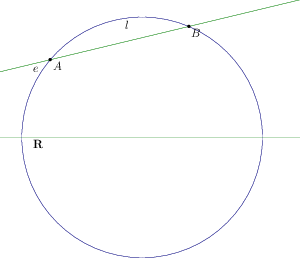

In [0]:
F.asy_write(300,-.7,2,-2,2,"euclid_and_lobachevsky","png")
Image("euclid_and_lobachevsky.png")

The same effect can be achived in one line with IPython Magic

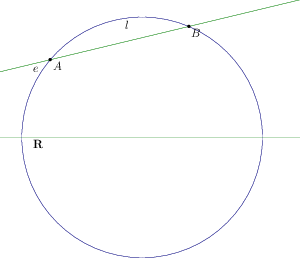

In [0]:
%asy_write(F, 300,-.7,2,-2,2,"euclid_and_lobachevsky")

## Uninstalation

If you do not need MoebInv anymore and want to uninstall it then execute the following cell.

In [0]:
!apt-get -qq remove -y libmoebinv0
!/usr/bin/moebinv-uninstall.sh

(Reading database ... 150456 files and directories currently installed.)
Removing libmoebinv0:amd64 (3.4.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Uninstalling MoebInv Python wrapper...
removed '/usr/lib/cfigure.so'
removed '/usr/lib/ccycle.so'
removed '/usr/lib/cginac.so'
removed '/usr/lib/python3.7/cfigure.so'
removed '/usr/lib/python3.7/ccycle.so'
removed '/usr/lib/python3.7/cginac.so'
removed '/usr/lib/python3.7/cycle/__init__.py'
removed '/usr/lib/python3.7/cycle/__pycache__/__init__.cpython-37.pyc'
removed directory '/usr/lib/python3.7/cycle/__pycache__'
removed directory '/usr/lib/python3.7/cycle/'
removed '/usr/lib/python3.7/figure/__init__.py'
removed '/usr/lib/python3.7/figure/__pycache__/__init__.cpython-36.pyc'
removed '/usr/lib/python3.7/figure/__pycache__/__init__.cpython-37.pyc'
removed directory '/usr/lib/python3.7/figure/__pycache__'
removed directory '/usr/lib/python3.7/figure/'
removed '/usr/lib/python3.6/cfigure.so'
removed '/usr/lib/python3.6/c

You can also optionally delete all or some standard packages installed above:

In [0]:
!apt-get -qq remove -y ginac-tools asymptote libboost-python1.65.1 libpython3.6

(Reading database ... 150456 files and directories currently installed.)
Removing asymptote (2.41-4) ...
Removing ginac-tools (1.7.4-1) ...
Removing libboost-python1.65.1 (1.65.1+dfsg-0ubuntu5) ...
Removing libpython3.6:amd64 (3.6.8-1~18.04.1) ...
Processing triggers for tex-common (6.09) ...
Running mktexlsr. This may take some time... done.
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


## Further info:
* [MoebInv library full documentation](https://sourceforge.net/projects/moebinv/files/docs/figure.pdf)
* [MoebInv Home page](http://moebinv.sourceforge.net/)
* [MoebInv CoLab Notebooks](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Table%20of%20contents.ipynb)
* [MoebInv CodeOcean capsule](https://codeocean.com/capsule/7952650/tree)